# Objective: Build a machine learning model to predict whether or not the patients in the dataset have diabetes.

### Short description of the variables in the dataset
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- Skin: ThicknessTriceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

[Refer here for more information about the dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/)

### Summary of steps:
- a. Understand the dataset
- b. Literature review (Links are in the comments below)
- c. Data cleaning and transformation
- d. Feature scaling
- e. Splitting the dataset
- f. Training and prediction using regression model
- g. Check accuracy of prediction by passing the data to confusion matrix
- h. Check influence of the features on prediction
- i. Retrain the model with optimized parameters and important features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
#sns.set()

### Load Dataset

In [119]:
# read the data into a Pandas DataFrame
raw_data = pd.read_csv('pima-indians-diabetes.csv') 

In [118]:
# print the first 5 rows of data from the dataframe
df = raw_data.copy() #make a copy of the raw data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Print a concise summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Minimum value for many variables is Zero. It is not quite possible to have a 0  BMI or 0 blood pressure.  It seems like null values have been coded as zeros in the dataset.

In [6]:
# Count number of zeros in eacg variable
(df == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Visualise the data to get a better understanding of the variables and their distribution.

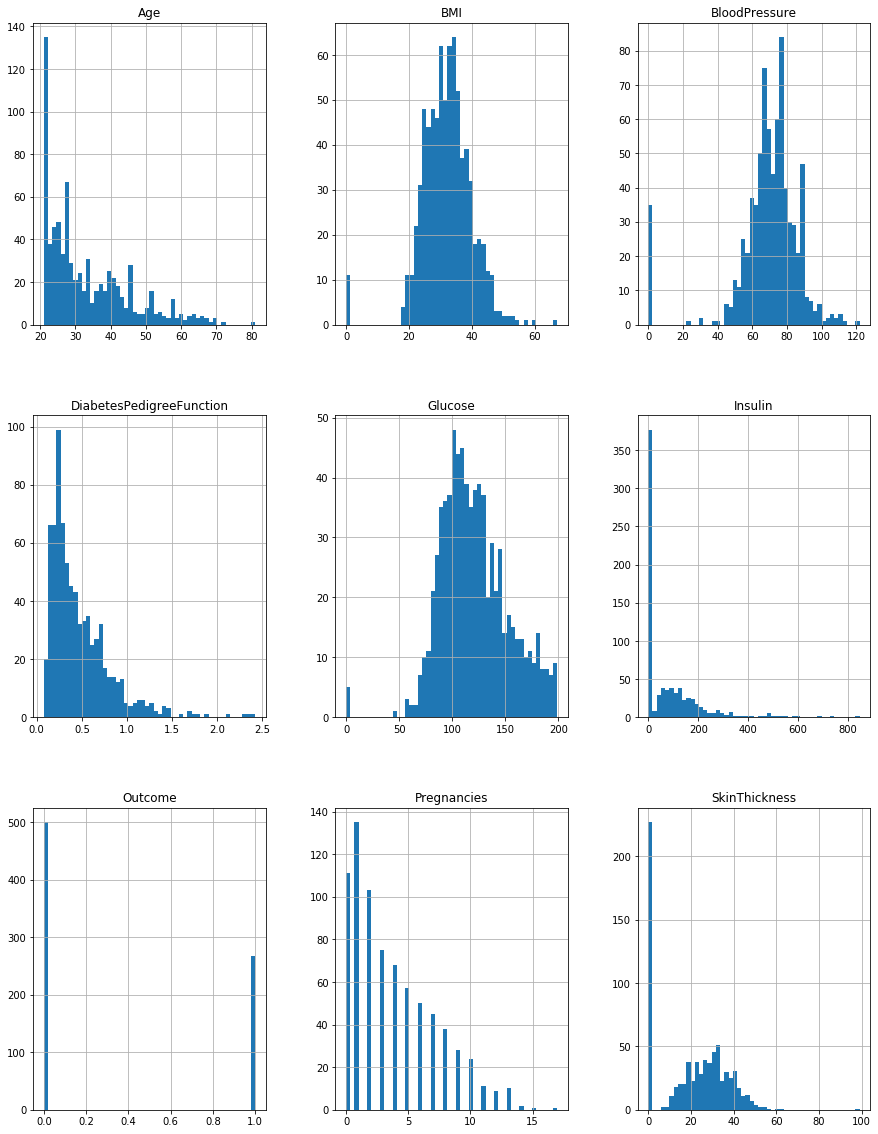

In [7]:
# Histogram of al variables
df.hist(bins = 50, figsize = (15,20))
plt.show;

In [8]:
pd.crosstab(df.Age,df.Pregnancies, margins = True) # compare number of pregnancies with Age

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,All
Age,,,,,,,,,,,,,,,,,,
21,21,23,14,3,2,0,0,0,0,0,0,0,0,0,0,0,0,63
22,17,22,18,10,4,0,0,0,1,0,0,0,0,0,0,0,0,72
23,8,13,10,3,3,0,1,0,0,0,0,0,0,0,0,0,0,38
24,9,14,9,7,4,1,1,1,0,0,0,0,0,0,0,0,0,46
25,13,7,14,9,2,3,0,0,0,0,0,0,0,0,0,0,0,48
26,9,7,5,5,4,1,2,0,0,0,0,0,0,0,0,0,0,33
27,5,4,8,6,3,4,2,0,0,0,0,0,0,0,0,0,0,32
28,2,8,5,6,5,4,5,0,0,0,0,0,0,0,0,0,0,35
29,3,6,5,2,5,2,3,1,0,1,1,0,0,0,0,0,0,29


### Check for correlation between variables

(9.0, 0.0)

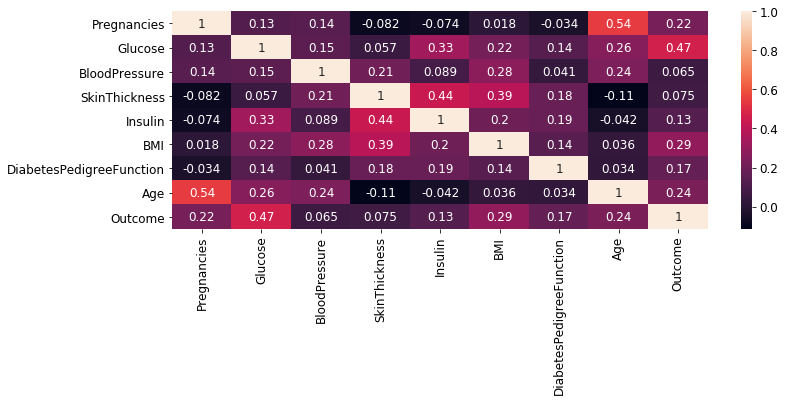

In [128]:
df_corr = df.corr()
plt.figure(figsize = (12,4))
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- Nearly half of the patients have 0 insulin levels which again is not possible(because 0 insulin level indicates Type 1 diabetes and the diabetes type Pima Indian popultion is exclusively Type 2 ([more on this](https://diabetes.diabetesjournals.org/content/53/5/1181)). Getting rid of these records is not an option because this would remove a lot of patients from the dataset. We will replace the missing values with the mean insulin levels. 

- Zeros for other features should also have to be treated the same way

- There are many patients in the dataset who have had more than 10 pregnancies which seems like outliers, however the age of these patients allows them to have so many pregnancies.Because we do not have much information on the background of the patients, and do not know at this stage how important pregnancy is as for prediction, let's keep it that way.

- there is class imbalance in the output variable: 65% Diabetes -ve, and 35% Diabetes +ve. This could impact the predections

- There's no strong correlation between the independent variables, hence no multicolinearity.

## Data cleaning and Transformation
**Replace the missing values (zeros) with means in all variables except Pregnancies and Outcome**

In [12]:
# calculate mean for each feature and replace the missing values with them

# Numpy considers zeros as well while calculating the Mean. So replace zeros in the dataset with 'NaN' before calcualting Mean.

df['BMI']=df['BMI'].replace(0, np.nan)
df['Glucose']=df['Glucose'].replace(0, np.nan)
df['BloodPressure']=df['BloodPressure'].replace(0, np.nan)
df['SkinThickness']=df['SkinThickness'].replace(0, np.nan)
df['Insulin']=df['Insulin'].replace(0, np.nan)

# replace zero values in BMI with mean values of BMI
df['BMI'] = df.BMI.fillna((df['BMI'].mean()))

# replace zero values in Glucose with mean values of Glucose
df['Glucose'] = df.Glucose.fillna((df['Glucose'].mean()))

# replace zero values in SkinThickness with mean values of SkinThickness
df['SkinThickness'] = df.SkinThickness.fillna((df['SkinThickness'].mean()))

# I'd want to drop this variable because of the high number of missing values.
# Dropping an important variabe is a harsh step and should be done with caution. For now, we'll keep it. 
# replace zero values in Insulin with mean values of Insulin
df['Insulin'] = df.Insulin.fillna((df['Insulin'].mean()))

# replace zero values in BloodPressure with mean values of BloodPressure
df['BloodPressure'] = df.BloodPressure.fillna((df['BloodPressure'].mean()))


**Define x and y variables**

In [13]:
# Define input and target variables
y = df.Outcome
x = df.drop(['Outcome'], axis = 1) # use entire dataset minus the target variable

## Feature Scaling
Machine Learning agorithms do not work well if the features have different values.  Because the data is normally distributed, we will rescale the features using normalization.

In [14]:
means = np.mean(x, axis=0)
stds = np.std(x, axis=0) 
x = (x - means)/stds

## Splitting the Dataset into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state =42)
# 42 is the seed used by the random number generator

## Before traing a model let's find out null accurcy.
Null accuracy is the accuracy that could be acheived by always predicting the most frequent class (Outcome in this case). Null accuracy for this dataset is around 65%; The Machine Learning model should acheive 65% accuracy at the least.

In [16]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.6536796536796536

## Train a Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\naren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict outcome for test dataset and measure it accuracy against actual outcomes

In [18]:
from sklearn.metrics import accuracy_score
y_predict = logreg.predict(x_test)
print(accuracy_score(y_test,y_predict))

0.7402597402597403


The model has an accuracy score of 74% which is better than the  Null Accuracy.

### The accuracy paradox

Accuracy score is the number of correct predictions made divided by the total number of predictions made. In a problem where there is a large class imbalance, a model can predict the value of the majority class for all predictions (for exampe, Diabetes -ve in this dataset) and still achieve a high classification accuracy. So accuracy score can be misleading at times. Using a Confusion Matrix is a clean and unambiguous way to present the prediction results of a classifier.

In [19]:
# get actual class distribution of the testing set (using pandas series methos)
y_test.value_counts()

0    151
1     80
Name: Outcome, dtype: int64

In [20]:
# Plot the model's prediction using confusion matrix
from sklearn.metrics import confusion_matrix
confm = confusion_matrix(y_test,y_predict)
print(confm)

[[124  27]
 [ 33  47]]


(1.7, 0.3)

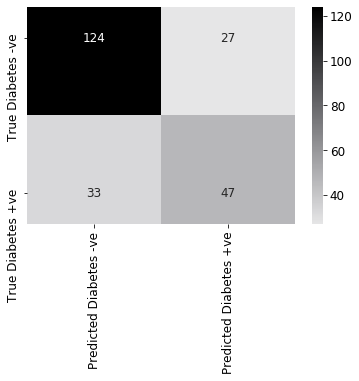

In [133]:
#vizualize confusion matrix

cmap = sns.cubehelix_palette(50,hue = 0.05, rot = 0, light = 0.9,dark = 0, as_cmap = True)
ax = sns.heatmap(confm, cmap = cmap,xticklabels = ['Predicted Diabetes -ve', 'Predicted Diabetes +ve'],
            yticklabels =['True Diabetes -ve','True Diabetes +ve'], annot = True, fmt ="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.2, top - 0.2)

In [22]:
# calculate precision and recall scores 
precision = np.round(metrics.precision_score(y_test, y_predict),2)*100
recall = np.round(metrics.recall_score(y_test,y_predict),2)*100
print('Precision score: ' + str(precision))
print('Recall score: ' + str(recall),)

Precision score: 64.0
Recall score: 59.0


In [117]:
# calculate precision and recall scores using sklearn's built in function
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



The model performs well in predicting Diabetes -ve patients, however performs poorly in predicting Diabetes +ve patients. As we can see, accuracy can be misleading. The cost of misclassification, especially in the medical context can be too high. 
Let's see how we could inprove the accuracy of Diabetes +ve prediction. Before that, let's also take a look features in the dataset have greater infuence on predictions.

Text(0.5, 0, 'Importance')

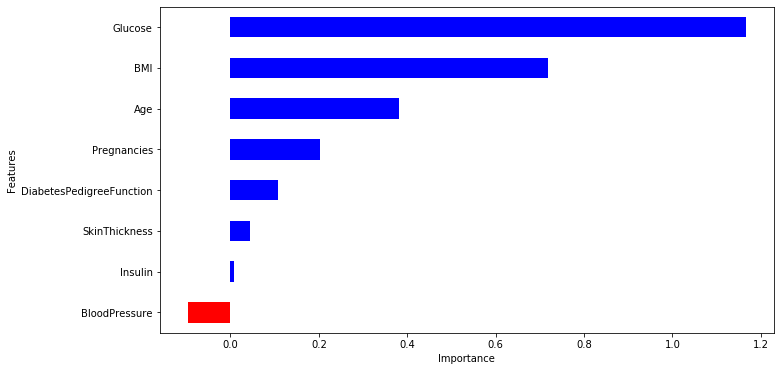

In [23]:
# Plot coefficients on bar chart
coeff = list(logreg.coef_[0])
labels = list(x.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Performance Improvement Options

**Because there is a class imbalance in output variable** 
- Stratify train and test data
- Add class weight

**Remove variable that have negative or little infuence on predictions**

In [111]:
# make a copy of x and y variables
x2 = x.copy()
x2 = x2.drop(['BloodPressure', 'Insulin'], axis = 1)
y2 = y.copy()

In [112]:
#Stratify the data while splitting
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2, test_size = 0.3, random_state =42, stratify = y)
# 42 is the seed used by the random number generator

# Train Logistic regression model with balanced weights
lr_wt = LogisticRegression(class_weight = 'balanced')
lr_wt.fit(x2_train, y2_train)
lr_predicted = lr_wt.predict(x2_test)


C:\Users\naren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
#Classification report with revised parameters
print(metrics.classification_report(y2_test, lr_predicted))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       150
           1       0.65      0.70      0.67        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231



In [110]:
# Classification report before fine tuning 
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



## The sensitivity and specificity trade off
The retrained model acheived a slightly better accuracy (76%) and higher recall rate (70%) at the cost of precision. According to me a 10% increase in recall rate at the cost of 4% loss in precision is acceptable.

## Conclusion
As we can see, accuracy score can be misleading. Depending on the type of problem, sometimes it may be desirable to select a model with a lower accuracy because it has a greater predictive power on the problem.

## Ideas for further performance improvements

- **Use GridSearchCV to fine tune the parameters**
- **Adjust the classification threshold**
- **Use algorithms that are less afected by outliers**